In [1]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install prophet

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 8.5 MB/s eta 0:00:02
   - -------------------------------------- 0.5/13.3 MB 8.5 MB/s eta 0:00:02
   - -------------------------------------- 0.5/13.3 MB 8.5 MB/s eta 0:00:02
   --------- ------------------------------ 3.1/13.3 MB 3.6 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/13.3 MB 4.1 MB/s eta 0:00:03
   ------------------ --------------------- 6.3/13.3 MB 5.0 MB/s eta 0:00:02
   --------------------- ------------------ 7.1/13.3 MB 4.9 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/13.3 MB 4.5 MB/s eta 0:00:02
   ------------------------ --------------- 8.1/13.3 MB 4.4 MB/s eta 0:00:02
   ------------------------- -------------- 8.4/13.3 MB 4.2 MB/s eta 0:00:02
   --------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.8 MB 7.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.8 MB 7.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 2.9 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.8 MB 4.1 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.8 MB 6.2 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.8 MB 6.3 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 6.1 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- -------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


23:02:35 - cmdstanpy - INFO - Chain [1] start processing
23:02:35 - cmdstanpy - INFO - Chain [1] done processing



--- Next 7 Days Price Predictions ---
        ds         yhat
2025-08-12 73916.997114
2025-08-13 74102.923749
2025-08-14 74288.850385
2025-08-15 74474.777021
2025-08-16 74660.703656
2025-08-17 74846.630292
2025-08-18 75032.556928


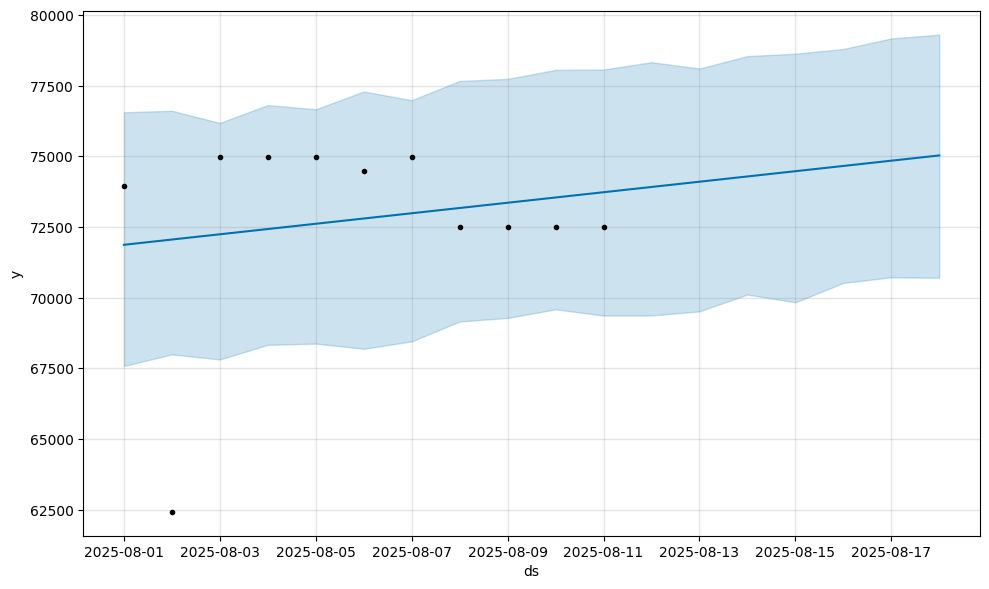

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Name of your CSV file
file_name = "dell_data.csv"

try:
    # Load data from the CSV file
    df = pd.read_csv(file_name)

    #  Normalize column names and prepare for Prophet
    df.columns = df.columns.str.strip().str.lower()  # Clean and lowercase column names
    df = df.rename(columns={'date': 'ds', 'price': 'y'})  # Rename to Prophet format

    # Ensure the 'ds' column is in datetime format
    df['ds'] = pd.to_datetime(df['ds'], format='%d-%m-%Y')

    # Train the Prophet model
    model = Prophet()
    model.fit(df)

    #  Create a DataFrame for future predictions
    future = model.make_future_dataframe(periods=7)

    #  Make the predictions
    forecast = model.predict(future)

    #  Print the predictions
    print("\n--- Next 7 Days Price Predictions ---")
    print(forecast[['ds', 'yhat']].tail(7).to_string(index=False))

    #  Optional: Plot the forecast
    fig1 = model.plot(forecast)
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Make sure it's in the same folder.")
except Exception as e:
    print(f"An error occurred: {e}")